## 컨볼루션 신경망(Convolutional Neural Network, CNN)
### 이미지의 영역 처리(Convolution)
- 공간영역 기반 처리
- mask내의 원소값과 공간 영역에 있는 입력 영상의 화소값들을 대응되게 곱하여 출력값화소를 계산
- mask를 이미지는 filter, AI는 kernal이라는 말을 사용

- Blurring
- Sharpening
- Edge
   * 차분연산 > 유사연사, 차연산
   * 1차 미분연산 > Roberts edge detection, Prewitt edge detection, Sobel edge detection
   * 2타 미분연산 > Laplacian edge detection, LoG, DoG
   * Canndy edge detection; 블러링을 통한 노이즈 제거,화소 기울기의 강도와 방향 검출, 비최대치 억제, 이력 임계값으로 edge 결정
   * Filtering > Min/max, 경계처리, median

In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]='1'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255  # 1(흑백): 이미지 채널 수, 3(컬러)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

# 함수 Conv2D 제공: 그림 1장 들어가면 32장으로 만들어줌
# kernel_size 각 칸의 수가 일종의 가중치
# input_shape 28*28 -> 26*26 으로 나옴
# 최종 32장을 만들어주니 kernel, kernel별 bias 모두 32개 존재
# 파라미터 kernel_size 9개, bias 1개 -> 10개 => 320개

# MaxPooling2D: pool_size=(2, 2) 내 최대값 산출 -> 전체 크기 1/4로 감소
# shape을 줄여나가되 그 특징은 유지를 하겠다
# 새로운 파라미터 생성 X

# Dropout: 과대적합 방지
# 순전파를 시킬 때 batch마다 0.25를 무작위로 잡아서 그 쪽은 순전파 미실시
# 새로운 파라미터 생성 X

# Flatten: 1차원으로 데이터 펼치기
# Dense 사용 위해

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, callbacks=[early_stopping])

Epoch 1/30
225/225 [==============================] - 27s 116ms/step - loss: 0.2619 - accuracy: 0.9192 - val_loss: 0.0704 - val_accuracy: 0.9783
Epoch 2/30
225/225 [==============================] - 27s 118ms/step - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.0540 - val_accuracy: 0.9841
Epoch 3/30
225/225 [==============================] - 26s 114ms/step - loss: 0.0487 - accuracy: 0.9848 - val_loss: 0.0469 - val_accuracy: 0.9859
Epoch 4/30
225/225 [==============================] - 26s 115ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0445 - val_accuracy: 0.9869
Epoch 5/30
225/225 [==============================] - 25s 111ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0431 - val_accuracy: 0.9875
Epoch 6/30
225/225 [==============================] - 25s 111ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0405 - val_accuracy: 0.9880
Epoch 7/30
225/225 [==============================] - 26s 116ms/step - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.0418 - val_ac

In [7]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test,y_test)[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0309 - accuracy: 0.9921
Test Accuracy: 0.9921


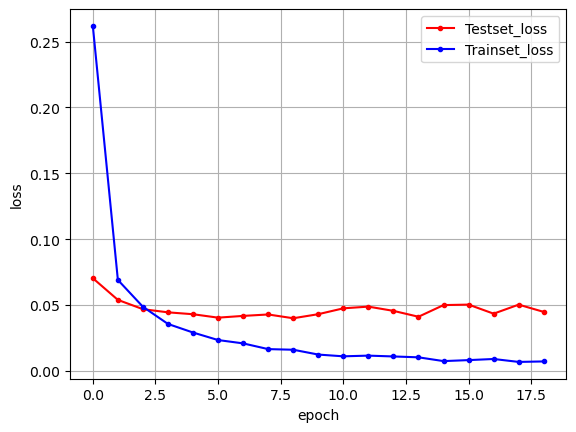

In [8]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()